

Tradução - Gabriel S. Ferrante
# **Espaços de Cor**

Iremos aprender:
1. Ver os canais individualmente de uma imagem RGB
2. Manipular o espaço de cores
3. Introdução sobre o espaço de cor HSV

In [2]:
# Com base em nossas aulas, temos já nossas importações e nossa função de apresentar imagem. 
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


In [3]:

image = cv2.imread('./images/castara.jpeg')

# Usamos a função cv2.split para pegar cada canal separadamente
B, G, R = cv2.split(image)
print(B.shape)
print(G.shape)
print(R.shape)

(1280, 960)
(1280, 960)
(1280, 960)


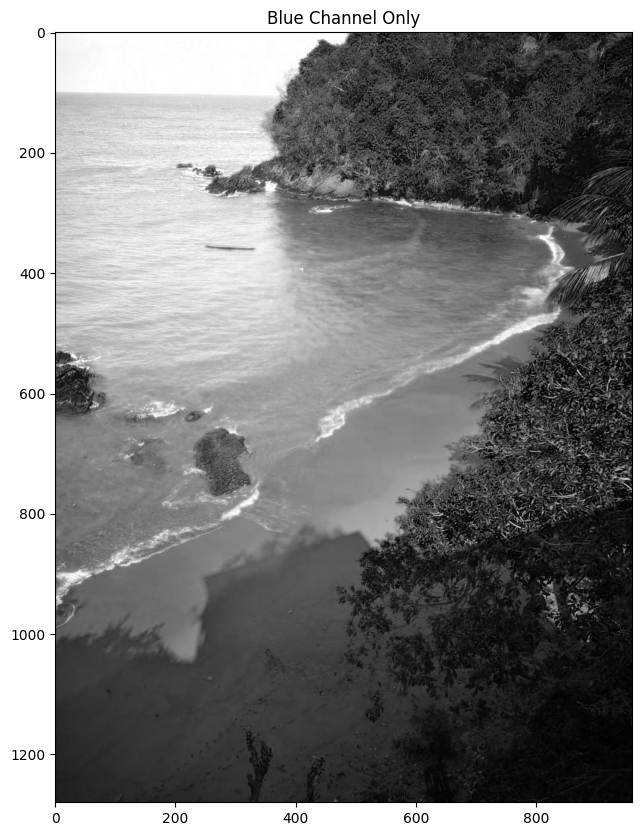

In [4]:
#Cada espaço de cores ativado parecerá uma escala de cinza, pois não possui os valores para os outros canais de cores
imshow("Blue Channel Only", B)

<class 'tuple'>


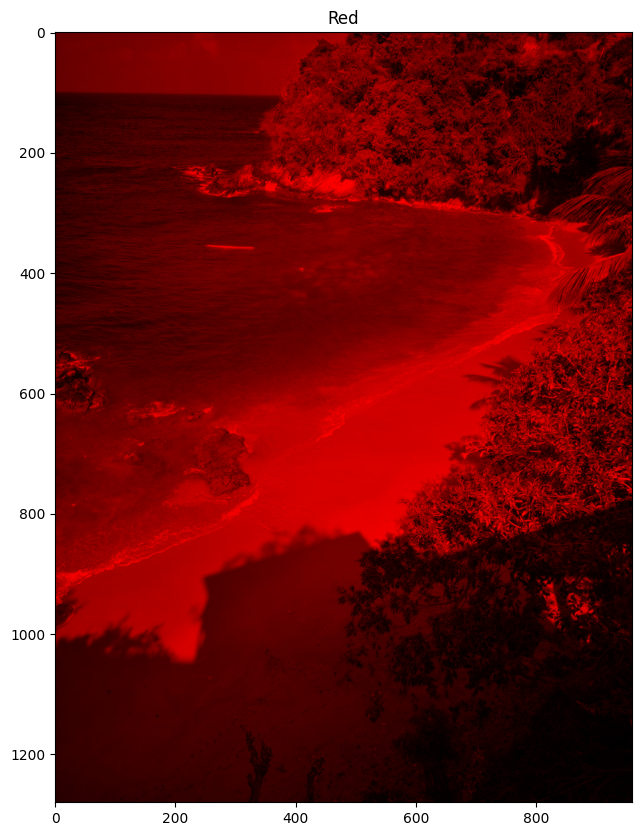

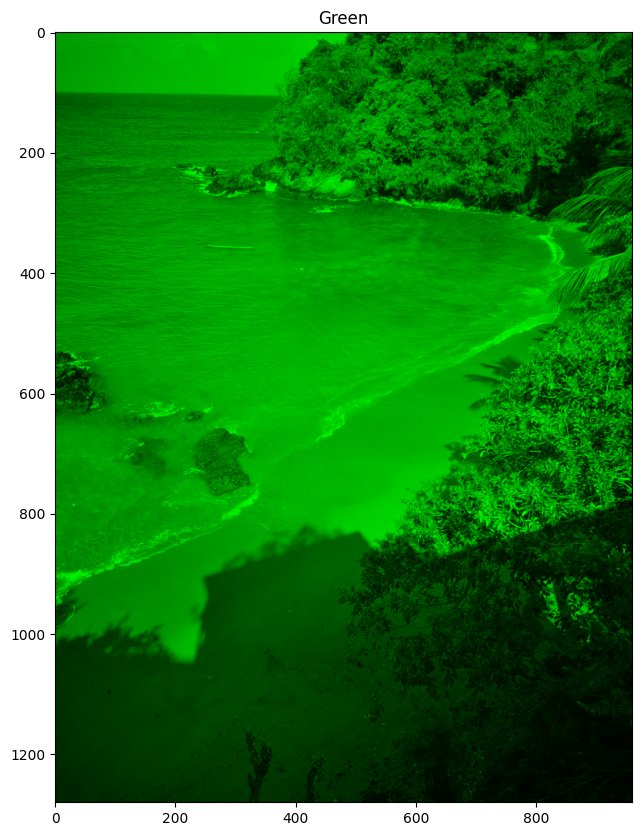

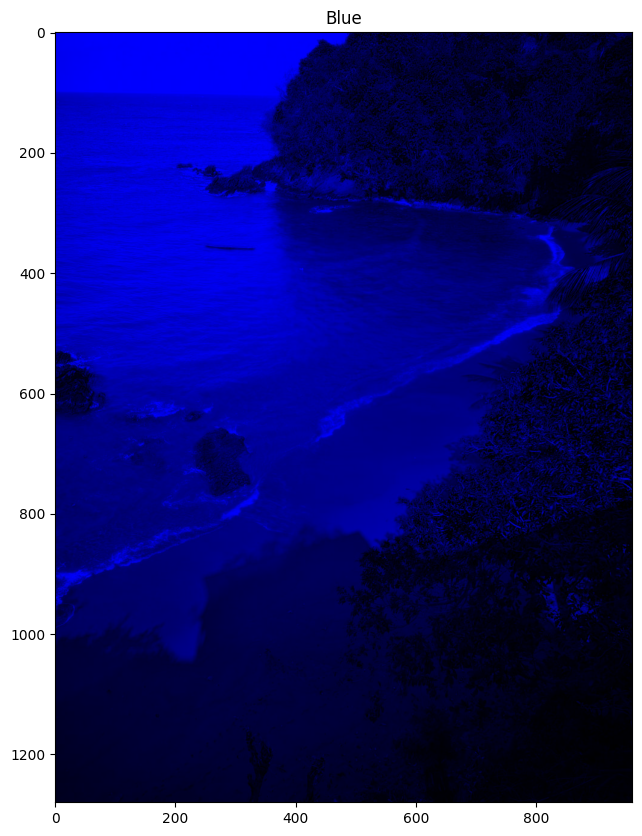

In [6]:
import numpy as np

# Vamos, portanto, criar uma matriz de zeros, com as dimensões da imagem.
print(type(image.shape[:2]))
# função zeros do numpy, retorna uma matriz com as dimensões passadas.
zeros = np.zeros(image.shape[:2], dtype = "uint8")

#Agora, iremos fundir matrizes. É ao passo contrário da função .split do openCv. 
#Iremos fingir que temos os valores dos outros canais, preenchendo com zero.

#Função .merge()

imshow("Red", cv2.merge([zeros, zeros, R])) #Preenchendo para a imagem em vermelho
imshow("Green", cv2.merge([zeros, G, zeros]))
imshow("Blue", cv2.merge([B, zeros, zeros]))

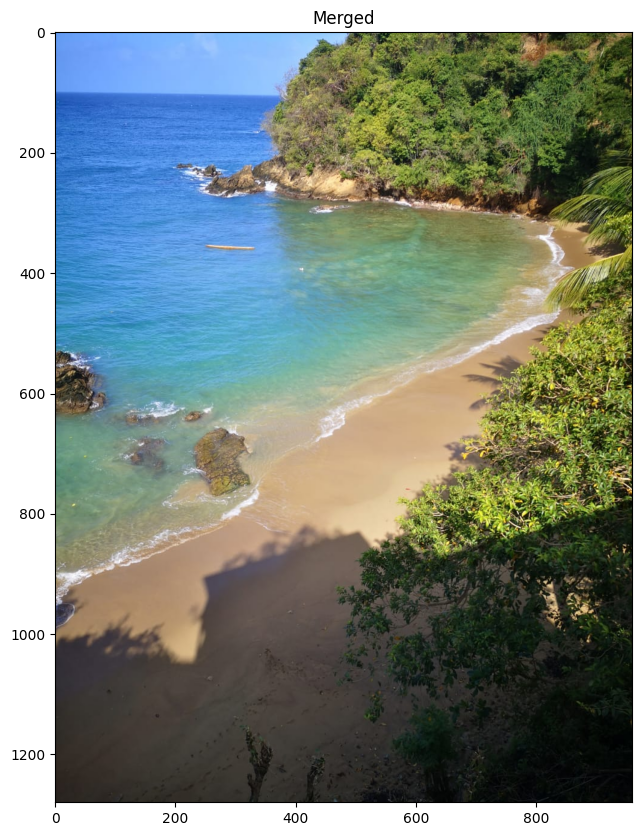

In [7]:
image = cv2.imread('./images/castara.jpeg')

# Como já haviamos feito, repartimos os canais de cores com .split
B, G, R = cv2.split(image)

# Revertemos com o .merge
merged = cv2.merge([B, G, R]) 
imshow("Merged", merged) 

B + 100: Aqui, 100 é somado ao valor de cada pixel no canal azul (B). Se o valor original do azul em um pixel era 50, por exemplo, ele agora será 150 (com um limite de 255, pois cada canal usa uma escala de 0 a 255).
Clipping (limite de valor): Se o valor resultante exceder 255 (o valor máximo permitido para cada canal), ele será automaticamente "clipado" para 255. Isso significa que qualquer valor acima de 255 será ajustado para 255.

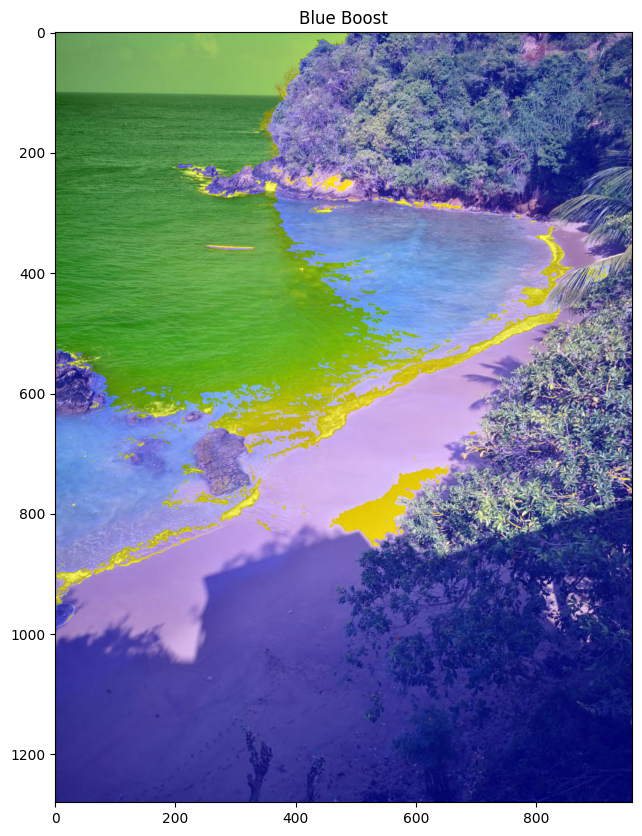

In [12]:
# Podemos, ampliar os valores de cada canal, durante a fusão.
merged = cv2.merge([B+100, G, R])
imshow("Blue Boost", merged)

## **O espaço de cor HSV**

![](https://upload.wikimedia.org/wikipedia/commons/f/f2/HSV_color_solid_cone.png)

- Hue: 0 - 179 
- Saturation: 0 - 255
- Value (Intensity): 0 - 255

Hue (H) - Tonalidade:

Representa a "cor pura" (ou o matiz) e é medida em graus, variando de 0 a 360.
Cada valor representa uma cor específica: 0° para vermelho, 120° para verde e 240° para azul. As outras cores ficam entre esses valores:
Vermelho (0°), amarelo (~60°), verde (120°), ciano (180°), azul (240°) e magenta (~300°).


Saturation (S) - Saturação:

Indica a intensidade ou pureza da cor, medida como uma porcentagem ou em uma escala de 0 a 255 (dependendo da implementação).
Quando a saturação é alta (255), a cor é muito pura e vívida; quando é baixa (0), a cor fica mais próxima de um cinza, perdendo intensidade.


Value (V) - Valor (ou Brilho):

Representa o brilho ou luminosidade da cor, variando de 0 (preto) a 255 (cor máxima).
Valores altos indicam uma cor brilhante e clara, enquanto valores baixos tornam a cor mais escura.

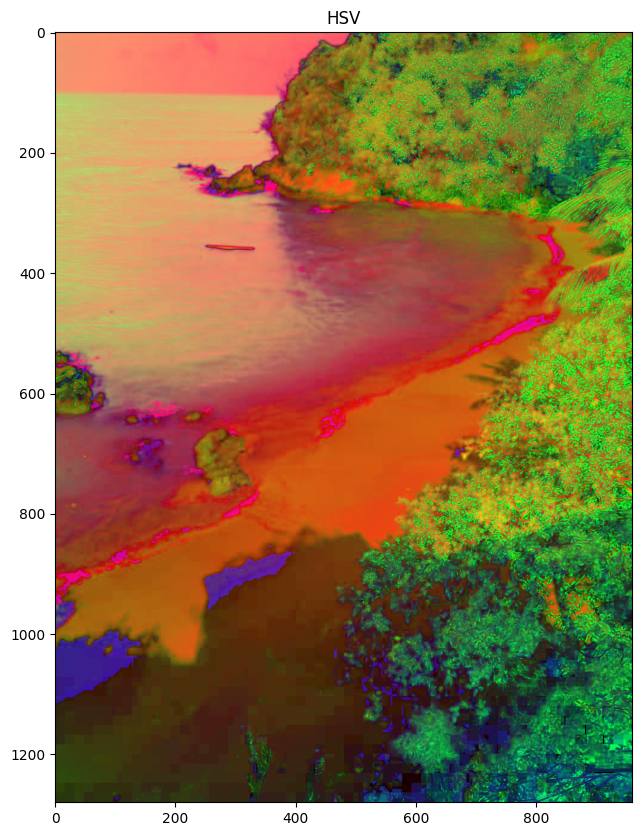

In [13]:
# Carregando a imagem
image = cv2.imread('./images/castara.jpeg')

# Convertendo para HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
imshow('HSV', hsv_image)

#### Por que isso aconteceu? 

Por que nossa função de leitura de imagem lê somente RGB e não HSV

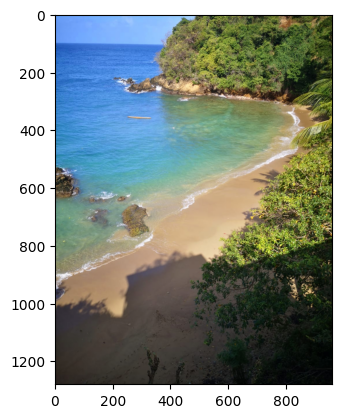

In [15]:
plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)) #conversão de HSV para RGB
plt.show()

### **Observando a imagem com somente cada canal de cor do HSV**

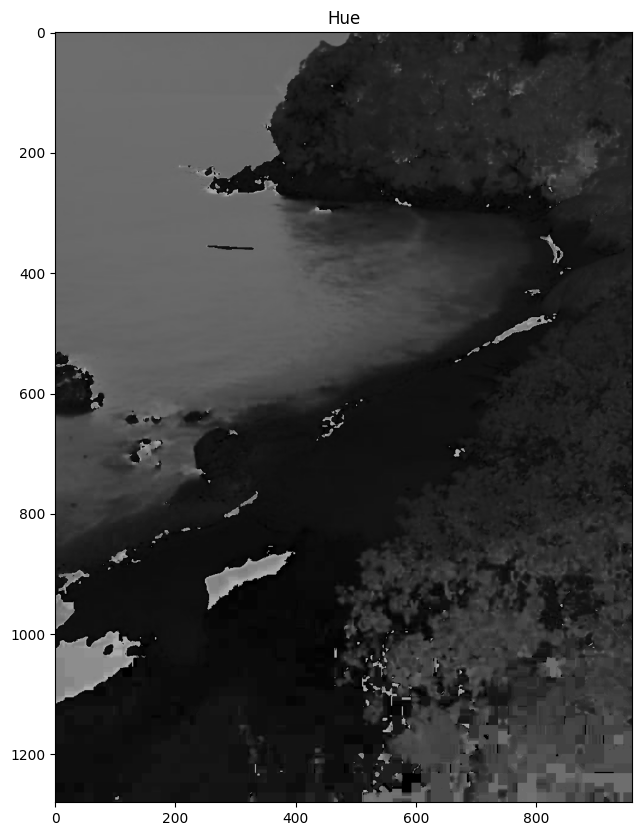

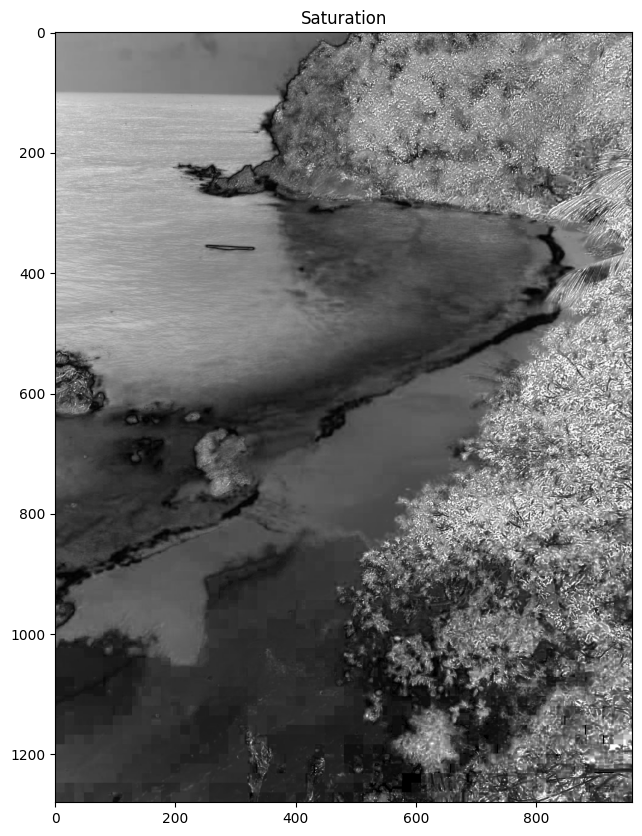

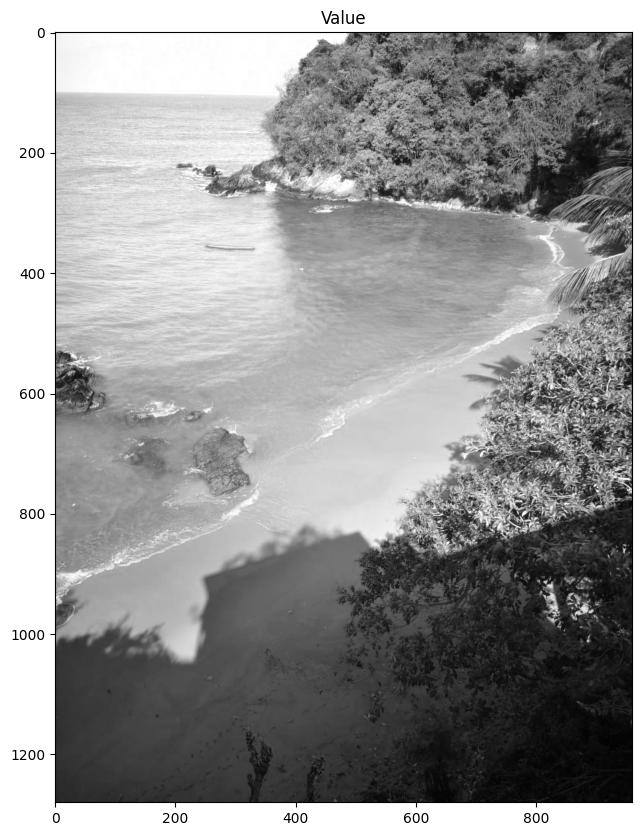

In [22]:
# Vendo cada canal
imshow("Hue", hsv_image[:, :, 0]) #passando todas as linhas e colunas mas somente o primeiro canal
imshow("Saturation", hsv_image[:, :, 1])
imshow("Value", hsv_image[:, :, 2])